### Property_Valuation_in_King_County_USA_using_AUTOML_and_Geo-enriched_data

### Table of Content

- [Introduction](#Introduction)

- [Necessary Imports](#Necessary-Imports)

- [Accessing the King County dataset for housing prediction](#Accessing-the-King-County-dataset-for-housing-prediction)

- [DataFrame & Definition](#DataFrame-&-Definition)

- [Exploring and Visualizing dataset Using Seaborn plots](#Visualizing-dataset)

- [Model Building using AutoML on King County housing dataset](#Model-building)

- [GeoEnriching the dataset using data enrich tool/Enriching the point feature with demographic data using geoenrichment service from Esri](#geoenrich)

- [Model Building using AutoML on Enrich data](#Model-Building-using-AutoML-on-Enrich-data)

- [Result Visualization](#Result-Visualization)

### Introduction <a id='Introduction'></a>

Houses are considered a basic need for all human beings for shelter. Prediction of housing prices can help an individual get the most out of the building, which may further help in affodability. In a traditional way, it is more of a manpower intensive task that involves visiting the site, capturing the aspects of the building, then quoting a price on the basis of the prior knowledge of sales, future town planning development schemes, market knowledge, utilities, and various other things that contribute as an asset.
However, we can take a data-driven approach by having prior knowledge about properties or capturing the details about the building in order to comment on price of new building. These data are used not only to predict prices, but also to provide a good idea for the range of aspects about properties in localities/cities.

Property valuation helps us to know the worth of the building. This can be helpful in various places, such as 

<ul>
 <li>To mortgage a property</li>
 <li>Buying or selling of property</li>
 <li>For taxation purpose</li>
 <li>For transfer of property</li>
 <li>Compulsory Acquisition</li>
</ul>

In the machine learning field, housing preidction is considered a regression task. Many machine learning approaches have been used to get better results. However, it has become tiresome to track all of the different approaches to individuals.Here, AutoML helps in playing a major role by giving the best fit model among all the approaches. In this notebook, we will use AutoML and enrich datasets to get better and quicker results without going through a series of ML algorithms.  

The primary data is downloaded from the [King County]("https://learngis.maps.arcgis.com/home/item.html?id=7d66f8d0adae4248a275787864be224a").Other data includes 2019 and 2017 census data using Esri's enrichment services.

### Necessary Imports <a id='Necessary-Imports'></a>

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image, HTML
import pandas as pd
import seaborn as sns
import arcgis
from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from arcgis.geoenrichment import Country
from arcgis.features import summarize_data
from arcgis.features.enrich_data import enrich_layer
from arcgis.learn import prepare_tabulardata,AutoML
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler,OneHotEncoder,Normalizer,StandardScaler

In [4]:
# Use your username & password to access the services
gis = GIS("home")

### Accessing the King County data as of 2015 <a id='Accessing-the-King-County-dataset-for-housing-prediction'></a>


Here we will be taking a feature layer hosted on ArcGIS Online. The dataset can be downloaded from here
[King County](https://learngis.maps.arcgis.com/home/item.html?id=7d66f8d0adae4248a275787864be224a) or it can be access using the item number "b9e59c0473514abe8da6f395c628e4af".

<Item title:"kchouse_tabletopoint" type:Feature Layer Collection owner:demos_deldev>
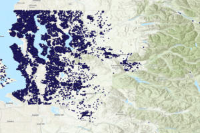

In [44]:
# the layer is already published on arcgisonline having item number b9e59c0473514abe8da6f395c628e4af
King_County_Feature = gis.content.get("b9e59c0473514abe8da6f395c628e4af")
King_County_Feature

In [45]:
#selecting the first layer of the content named as King_County_Feature
King_County_Feature = King_County_Feature.layers[0]

### Dataframe & Definition <a id='DataFrame-&-Definition'></a>

In [46]:
# convert layer it to a spatially enabled dataframe i.e. from the point feature layer of King County to pandas dataframe
sdf_kc = pd.DataFrame.spatial.from_layer(King_County_Feature)

In [47]:
# visualizing the spatial dataframe on the map 
sdf_kc.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
# to check the non null count & data types of each column
sdf_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       21613 non-null  int64   
 1   SHAPE          21613 non-null  geometry
 2   bathrooms      21613 non-null  float64 
 3   bedrooms       21613 non-null  int64   
 4   condition      21613 non-null  int64   
 5   date           21613 non-null  object  
 6   floors         21613 non-null  float64 
 7   grade          21613 non-null  int64   
 8   id             21613 non-null  int64   
 9   lat            21613 non-null  float64 
 10  long           21613 non-null  float64 
 11  price          21613 non-null  int64   
 12  sqft_above     21613 non-null  int64   
 13  sqft_basement  21613 non-null  int64   
 14  sqft_living    21613 non-null  int64   
 15  sqft_living15  21613 non-null  int64   
 16  sqft_lot       21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

In [13]:
# looking into to dataframe with 5 heads & 5 tails value
sdf_kc

OBJECTID                                              SHAPE  bathrooms  \
0             1  {"x": -122.25699999999995, "y": 47.51120000000...       1.00   
1             2  {"x": -122.31899999999996, "y": 47.72100000000...       2.25   
2             3  {"x": -122.23299999999995, "y": 47.73790000000...       1.00   
3             4  {"x": -122.39299999999997, "y": 47.52080000000...       3.00   
4             5  {"x": -122.04499999999996, "y": 47.61680000000...       2.00   
...         ...                                                ...        ...   
21608     21609  {"x": -122.34599999999995, "y": 47.69930000000...       2.50   
21609     21610  {"x": -122.36199999999997, "y": 47.51070000000...       2.50   
21610     21611  {"x": -122.29899999999998, "y": 47.59440000000...       0.75   
21611     21612  {"x": -122.06899999999996, "y": 47.53450000000...       2.50   
21612     21613  {"x": -122.29899999999998, "y": 47.59410000000...       0.75   

       bedrooms  condition             date  floors  grade          id  \
0             3          3  20141013T000000     1.0      7  7129300520   
1             3          3  20141209T000000     2.0      7  6414100192   
2             2          3  20150225T000000     1.0      6  5631500400   
3             4          5  20141209T000000     1.0      7  2487200875   
4             3          3  20150218T000000     1.0      8  1954400510   
...         ...        ...              ...     ...    ...         ...   
21608         3          3  20140521T000000     3.0      8   263000018   
21609         4          3  20150223T000000     2.0      8  6600060120   
21610         2          3  20140623T000000     2.0      7  1523300141   
21611         3          3  20150116T000000     2.0      8   291310100   
21612         2          3  20141015T000000     2.0      7  1523300157   

           lat  ...  sqft_basement  sqft_living  sqft_living15  sqft_lot  \
0      47.5112  ...              0         1180           1340      5650   
1      47.7210  ...            400         2570           1690      7242   
2      47.7379  ...              0          770           2720     10000   
3      47.5208  ...            910         1960           1360      5000   
4      47.6168  ...              0         1680           1800      8080   
...        ...  ...            ...          ...            ...       ...   
21608  47.6993  ...              0         1530           1530      1131   
21609  47.5107  ...              0         2310           1830      5813   
21610  47.5944  ...              0         1020           1020      1350   
21611  47.5345  ...              0         1600           1410      2388   
21612  47.5941  ...              0         1020           1020      1076   

       sqft_lot15  view_  waterfront  yr_built  yr_renovated  zipcode  
0            5650      0           0      1955             0    98178  
1            7639      0           0      1951          1991    98125  
2            8062      0           0      1933             0    98028  
3            5000      0           0      1965             0    98136  
4            7503      0           0      1987             0    98074  
...           ...    ...         ...       ...           ...      ...  
21608        1509      0           0      2009             0    98103  
21609        7200      0           0      2014             0    98146  
21610        2007      0           0      2009             0    98144  
21611        1287      0           0      2004             0    98027  
21612        1357      0           0      2008             0    98144  

[21613 rows x 23 columns]

*The dataframe table has 20 fields describing the houses and sale prices.Apart from ObjectID & Shape*
<table align="left" border="1" >
<thead>
<tr><th align="left">Field name
</th><th align="left">Field description</th></tr>
</thead>
<tbody align= "left">
<tr><td align= "left">date</td><td>Date of sale</td></tr>
<tr><td>price</td><td>Final transaction amount</td></tr>
<tr><td>bedrooms</td><td>Number of bedrooms</td></tr>
<tr><td>bathrooms</td><td>Number of bathrooms</td></tr>
<tr><td>sqft_living</td><td>Living space size (in square feet)</td></tr>
<tr><td>sqft_lot</td><td>Lot size (in square feet)</td></tr>
<tr><td>floors</td><td>Number of floors</td></tr>
<tr><td>waterfront</td><td>Is house on waterfront (1: yes, 0: not)</td></tr>
<tr><td>view</td><td>Categorical variable for view of the house</td></tr>
<tr><td>condition</td><td>Categorical variable for condition of the house</td></tr>
<tr><td>grade</td><td>Overall house grade based on King County grading system</td></tr>
<tr><td>sqft_above</td><td>Size of the house excluding basement (in square feet)</td></tr>
<tr><td>sqft_basement</td><td>Size of the basement (in square feet)</td></tr>
<tr><td>yr_built</td><td>Year house was built</td></tr>
<tr><td>yr_renovated</td><td>Year house was renovated (if renovated)</td></tr>
<tr><td>zipcode</td><td>ZIP Code of the house</td></tr>
 <tr><td>lat</td><td>Latitude of house</td></tr>
<tr><td>long</td><td>Longitude of house</td></tr>
<tr><td>sqft_living15</td><td>Size of living space in 2015 (in square feet)</td></tr>
<tr><td>sqrt_lot15</td><td>Size of lot in 2015 (in square feet)</td></tr>
</tbody>
</table>

*Some of the fields contain codes for specific values. These are explained below.*
<table align="left">
<thead>
<tr><th>Condition
</th><th>Condition
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>1</td><td>Poor</td><td>

Many repairs needed. House is showing serious deterioration.</td></tr>
<tr><td>2</td><td>Fair</td><td>

Some repairs needed immediately. Much deferred maintenance is needed.</td></tr>
<tr><td>3</td><td>Average</td><td>

Depending upon age of improvement, normal amount of upkeep for the age of the home.</td></tr>
<tr><td>4</td><td>Good</td><td>

Condition above the norm for the age of the home. This indicates extra attention and care has been taken to maintain it.</td></tr>
<tr><td>5</td><td>Very Good</td><td>

Excellent maintenance and updating on home; not a total renovation.</td></tr>
</tbody>
</table>

<table align="left">
<thead>
<tr><th>Grade
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>1-3</td><td>
    Falls short of minimum building standards; normally cabin or inferior structure.</td></tr>
<tr><td>4</td><td>Generally older low quality construction. The house does not meet code.</td></tr>
<tr><td>5</td><td>Lower construction costs and workmanship. The house has small, simple design.</td></tr>
<tr><td>6</td><td>Lowest grade currently meeting building codes. Low-quality materials and simple designs were used.</td></tr>
<tr><td>7</td><td>Average grade of construction and design. This is commonly seen in plats and older subdivisions.</td></tr>
<tr><td>8</td><td>Just above average in construction and design. Houses of this quality usually have better materials in both the exterior and interior finishes.</td></tr>
<tr><td>9</td><td>Better architectural design, with extra exterior and interior design and quality.</td></tr>
<tr><td>10</td><td>Homes of this quality generally have high-quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.</td></tr>
<tr><td>11</td><td>Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures, and more luxurious options.</td></tr>
<tr><td>12</td><td>Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.</td></tr>
<tr><td>13</td><td>Generally custom designed and built, approaching the mansion level. These houses have a large amount of highest quality cabinet work, wood trim, and marble with large entries.</td></tr>
</tbody>
</table>


<table align="left">
<thead>
<tr><th>View
</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td>0</td><td>Unknown</td></tr>
<tr><td>1</td><td>Fair</td></tr>
<tr><td>2</td><td>Average</td></tr>
<tr><td>3</td><td>Good</td></tr>
<tr><td>4</td><td>Excellent</td></tr>
</tbody>
</table>

### Exploring and Visualizing dataset Using Seaborn plots <a id='Visualizing-dataset'></a>

In [16]:
# Visualizing the points on map using the layer file
map1 = gis.map("King County")
map1.add_layer(King_County_Feature)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [18]:
# Dropping the columns such as date,id ,lat,long & OBJECTID to visualize the exploratory variables
sdf_kc_viz = sdf_kc.drop(columns=["OBJECTID", "SHAPE", "id", "date", "lat", "long"])

In [19]:
# looking into to dataframe with 5 heads & 5 tails value after dropping the columns
sdf_kc_viz

bathrooms  bedrooms  condition  floors  grade   price  sqft_above  \
0           1.00         3          3     1.0      7  221900        1180   
1           2.25         3          3     2.0      7  538000        2170   
2           1.00         2          3     1.0      6  180000         770   
3           3.00         4          5     1.0      7  604000        1050   
4           2.00         3          3     1.0      8  510000        1680   
...          ...       ...        ...     ...    ...     ...         ...   
21608       2.50         3          3     3.0      8  360000        1530   
21609       2.50         4          3     2.0      8  400000        2310   
21610       0.75         2          3     2.0      7  402101        1020   
21611       2.50         3          3     2.0      8  400000        1600   
21612       0.75         2          3     2.0      7  325000        1020   

       sqft_basement  sqft_living  sqft_living15  sqft_lot  sqft_lot15  view_  \
0                  0         1180           1340      5650        5650      0   
1                400         2570           1690      7242        7639      0   
2                  0          770           2720     10000        8062      0   
3                910         1960           1360      5000        5000      0   
4                  0         1680           1800      8080        7503      0   
...              ...          ...            ...       ...         ...    ...   
21608              0         1530           1530      1131        1509      0   
21609              0         2310           1830      5813        7200      0   
21610              0         1020           1020      1350        2007      0   
21611              0         1600           1410      2388        1287      0   
21612              0         1020           1020      1076        1357      0   

       waterfront  yr_built  yr_renovated  zipcode  
0               0      1955             0    98178  
1               0      1951          1991    98125  
2               0      1933             0    98028  
3               0      1965             0    98136  
4               0      1987             0    98074  
...           ...       ...           ...      ...  
21608           0      2009             0    98103  
21609           0      2014             0    98146  
21610           0      2009             0    98144  
21611           0      2004             0    98027  
21612           0      2008             0    98144  

[21613 rows x 17 columns]

In [14]:
# checking if there is any NAN or null value in the dataframe
sdf_kc_viz.isnull().sum()

bathrooms        0
bedrooms         0
condition        0
floors           0
grade            0
price            0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
view_            0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

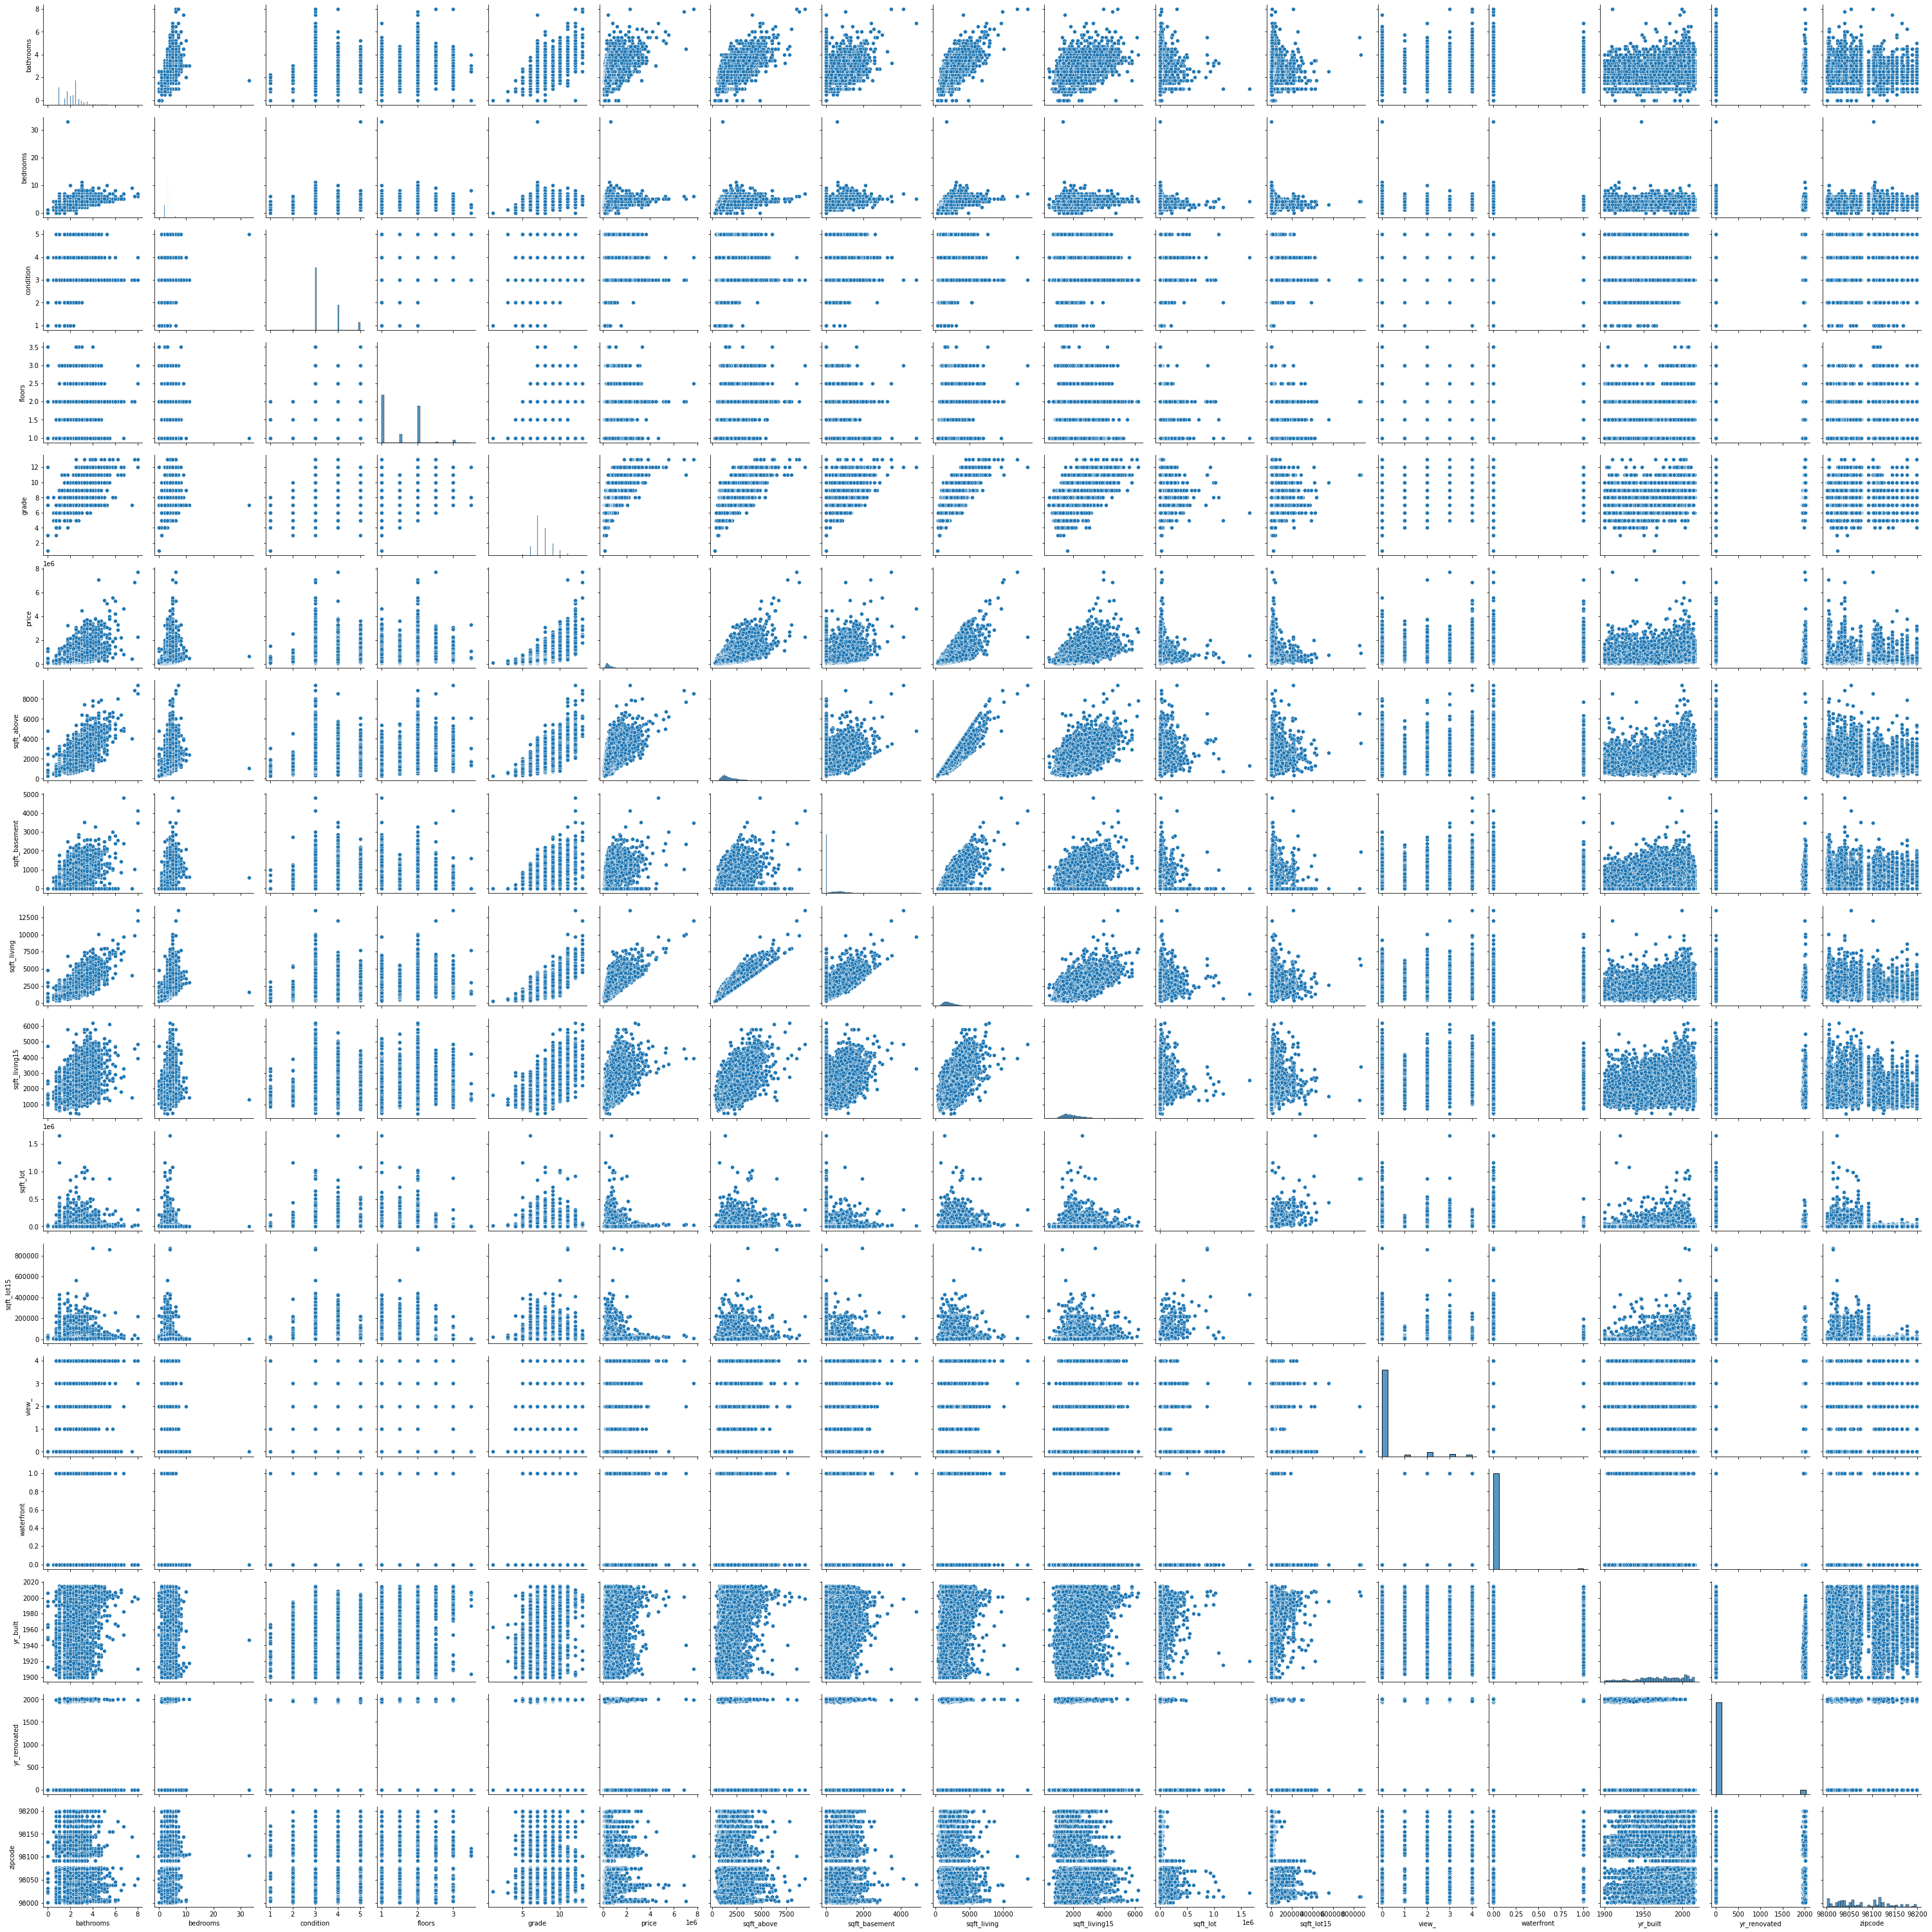

In [36]:
# you can use the scatterplot to explore the relationships by clicking one of the plots
sns.pairplot(sdf_kc_viz)

In above shown graph , a double click on the graph will display a larger version of the graph 
Creating the default pairplot among the variables.The plot summarizes relationships between pairs of different variables.Which helps in determing the correlation among the varibales.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

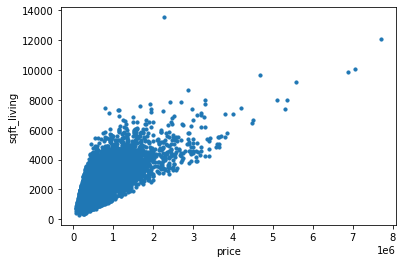

In [22]:
# scatterplot between price vs sqft_living.
sdf_kc_viz.plot.scatter(x="price", y="sqft_living", s=10)

It shows a postive relationship among the variables price and sqft_living i.e. higher the value of sqft_living higher will be the price

<AxesSubplot:xlabel='price', ylabel='bathrooms'>

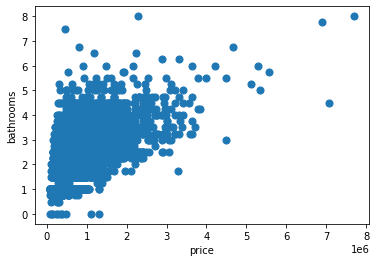

In [21]:
# scatterplot between price vs bathrooms
sdf_kc_viz.plot.scatter(x="price", y="bathrooms", s=50)

<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

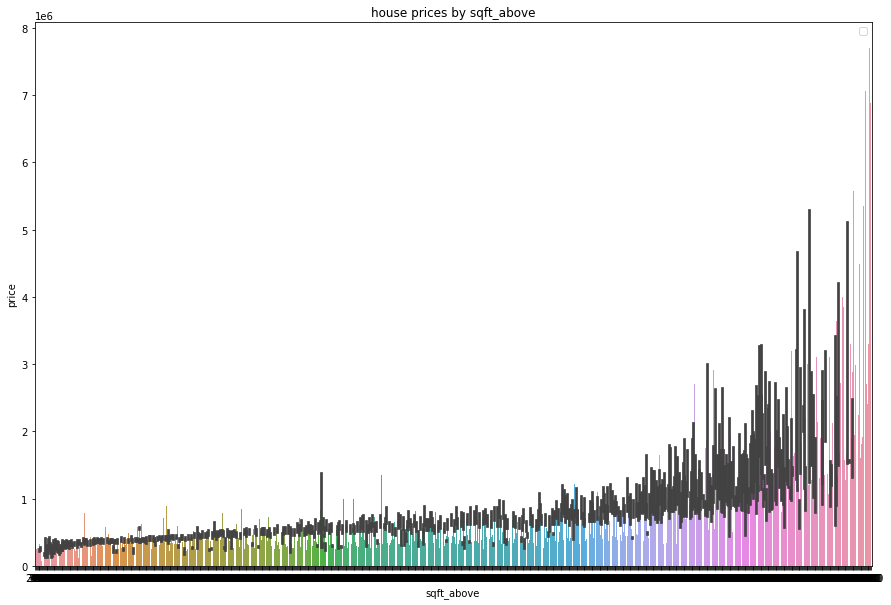

In [24]:
# barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
plt.title("house prices by sqft_above")
plt.xlabel("sqft_above")
plt.ylabel("house prices")
plt.legend()
sns.barplot(x="sqft_above", y="price", data=sdf_kc_viz)

C:\Users\sum11525\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bedrooms', ylabel='count'>

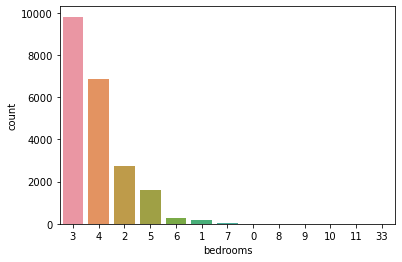

In [75]:
#countplot is plotted for the bedrooms to analyze the bedrooms capacity 
sns.countplot(sdf_kc_viz.bedrooms,order=sdf_kc_viz['bedrooms'].value_counts().index)

We can see from above graph that 3 bedrooms houses are highest in number. 

(array([2.844e+03, 9.332e+03, 6.074e+03, 2.356e+03, 7.250e+02, 1.740e+02, 6.300e+01, 2.500e+01, 1.300e+01, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  290.      ,  1173.333333,  2056.666667,  2940.      ,  3823.333333,  4706.666667,  5590.      ,  6473.333333,
         7356.666667,  8240.      ,  9123.333333, 10006.666667, 10890.      , 11773.333333, 12656.666667, 13540.      ]),
 <BarContainer object of 15 artists>)

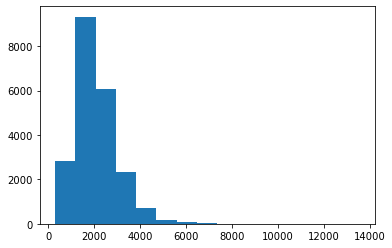

In [43]:
#A histogram is plotted for sqft living
plt.hist('sqft_living',data=sdf_kc_viz,bins=15)

The first array above the graph shows the bin count.Second arrays shows the bin range.
Through the above plot we can see 9332 rows is having range between sqft_living 1173 - 2056.66 sqft.

<AxesSubplot:>

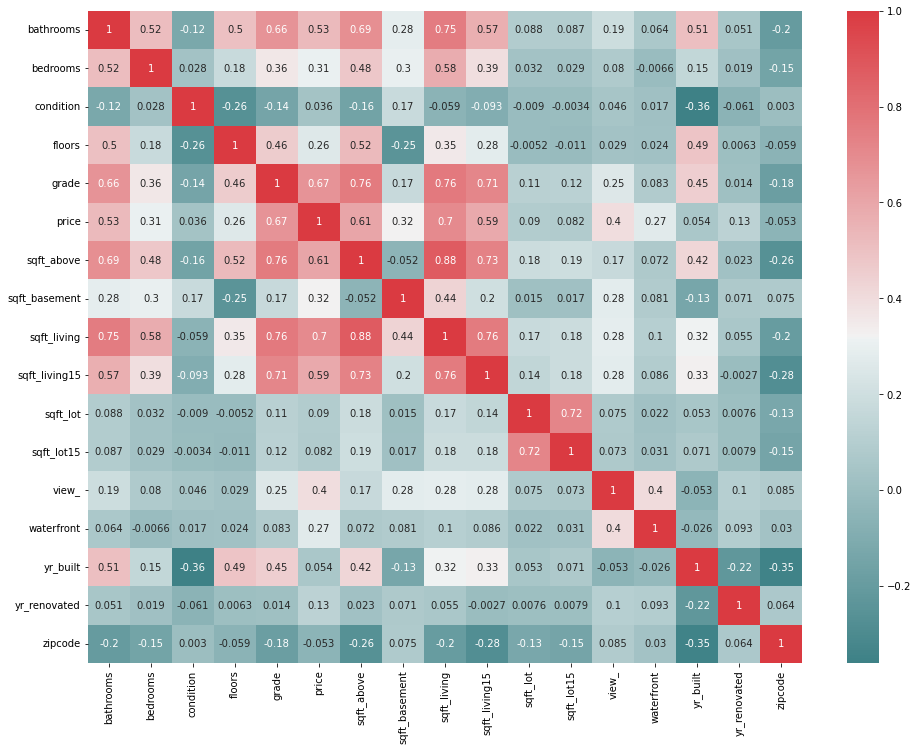

In [25]:
#heatmap plotting 
fig,ax=plt.subplots(figsize=(16,12))
colormap=sns.diverging_palette(200,11,as_cmap=True)
sns.heatmap(sdf_kc_viz.corr(),annot=True,cmap=colormap)

Pearson correlation coefficient (Pearson's r) quantifies the strength of the linear relationship between variables, or how much influence one variable has on another. An absolute value of Pearson's r close to one indicates a strong positive linear relationship, whereas values close to zero indicate a weak linear relationship.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

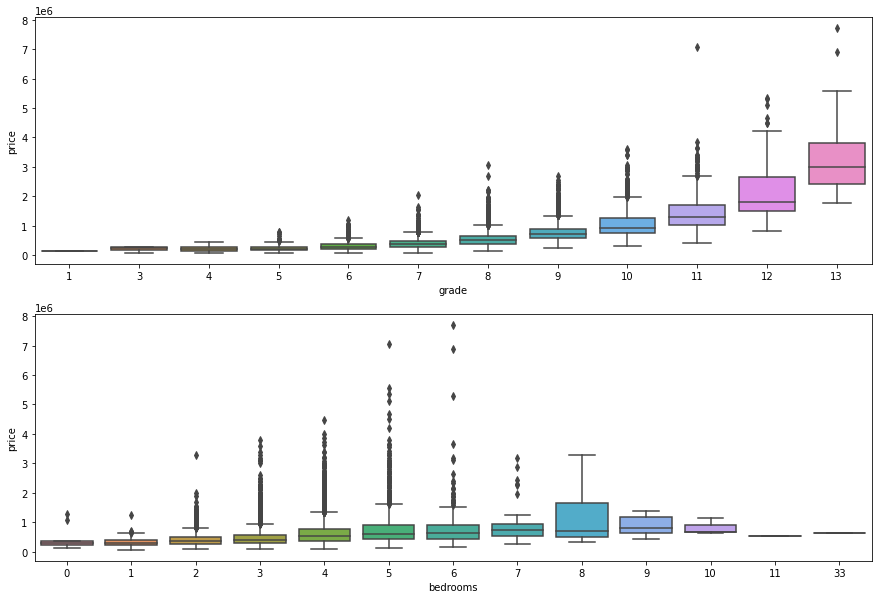

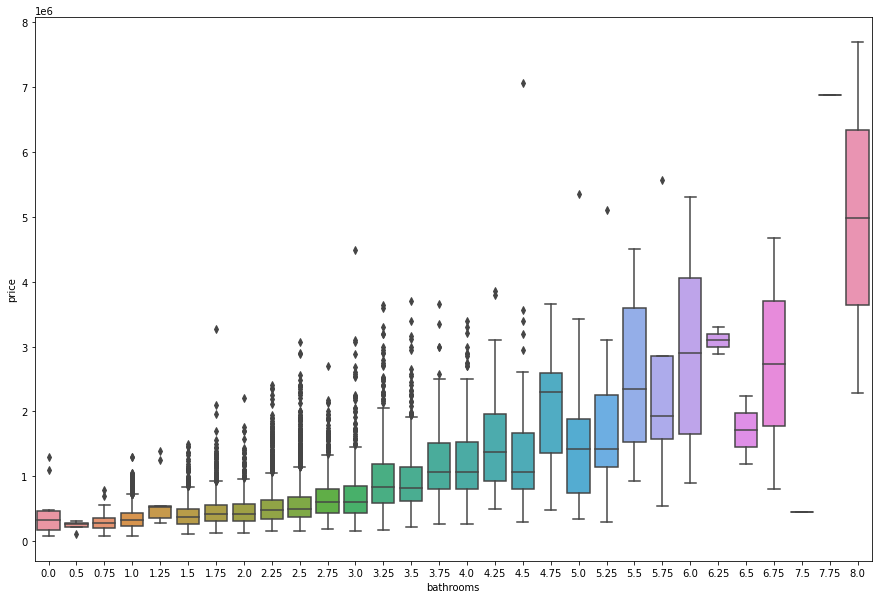

In [65]:
#boxplots
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=sdf_kc_viz['grade'],y=sdf_kc_viz['price'],ax=ax[0])
sns.boxplot(x=sdf_kc_viz['bedrooms'],y=sdf_kc_viz['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=sdf_kc_viz['bathrooms'],y=sdf_kc_viz['price'])

### Model Building using AutoML on King County housing dataset <a id='Model-building'></a>

In [48]:
# these are features which are to be used for prediction of the housing price
#zipcode is considered as categorical variable
X = [
    "bathrooms",
    "bedrooms",
    "condition",
    "floors",
    "grade",
    "sqft_above",
    "sqft_basement",
    "sqft_living",
    "sqft_living15",
    "sqft_lot",
    "sqft_lot15",
    "view_",
    "waterfront",
    "yr_built",
    "yr_renovated",
    ("zipcode", True),
]


In [49]:
# we can use different preprocessing technique to scale our input data i.e.Below RobustScaler() is used
preprocessors = [
    (
        "bathrooms",
        "bedrooms",
        "condition",
        "floors",
        "grade",
        "sqft_above",
        "sqft_basement",
        "sqft_living",
        "sqft_living15",
        "sqft_lot",
        "sqft_lot15",
        "view_",
        "waterfront",
        "yr_built",
        "yr_renovated",
        "zipcode",
        RobustScaler(),
    )
]

In [54]:
#splitting the dataset into train-test in ratio of 95%-5%.
X_train,X_test = train_test_split(sdf_kc, test_size=0.05,random_state=42, shuffle=True)

In [55]:
data = prepare_tabulardata(
    X_train, "price", explanatory_variables=X, preprocessors=preprocessors
)

C:\Users\sum11525\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1035: UserWarning:

Column zipcode has more than 20 unique value. Sure this is categorical?



After creating the AutoML object by passing the data obtained from prepare_tabulardata and using default values for other parameters, now we proceed to train the model using AutoML. This is done by calling the fit method as shown below. New folder will be created and all the models and their varients are saved in that folder.



In [56]:
AutoML_class_obj = AutoML(data=data,eval_metric = "r2")
AutoML_class_obj.fit()

Neural Network algorithm was disabled because it doesn't support n_jobs parameter.
Linear algorithm was disabled.
AutoML directory: AutoML_7
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_DecisionTree r2 0.552317 trained in 9.05 seconds
* Step default_algorithms will try to check up to 4 models
2_Default_LightGBM r2 0.86329 trained in 42.26 seconds
3_Default_Xgboost r2 0.854479 trained in 21.79 seconds
4_Default_RandomForest r2 0.667305 trained in 8.64 seconds
5_Default_ExtraTrees r2 0.649564 trained in 6.52 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.867601 trained in 0.21 seconds
AutoML fit time: 107.81 seconds
AutoML best model: Ensemble
All the evaluated models are saved in the path  D:\suman

In [59]:
#training score represents the score generated from train dataset 
AutoML_class_obj.score()

0.9450144225676299

In [58]:
#the r-square value for the test dataset
result1 = AutoML_class_obj.predict(X_test,prediction_type="dataframe")
print(r2_score(result1[['price']], result1[['prediction_results']]))

0.8908154370511783


### Enriching the point feature with demographic data using geoenrichment service from Esri <a id='geoenrich'></a>

The feature data is now created using selected demographics information for each tracts. This is accomplished accessing the geoenrichment services from Esri, which consists the latest census data. The entire data repository is first visualized, out of which the relevant variables are finalized from a literature study. These selected variables are searched for adding in the feature set.

In [5]:
# Displaying the various data topic available for geoenrichment for USA in the Esri database
usa = Country.get("US")
usa_data = usa.data_collections
df_usa_data = pd.DataFrame(usa_data)
df_usa_data.head()

analysisVariable                   alias  \
dataCollectionID                                                    
1yearincrements   1yearincrements.AGE0_CY  2021 Population Age <1   
1yearincrements   1yearincrements.AGE1_CY   2021 Population Age 1   
1yearincrements   1yearincrements.AGE2_CY   2021 Population Age 2   
1yearincrements   1yearincrements.AGE3_CY   2021 Population Age 3   
1yearincrements   1yearincrements.AGE4_CY   2021 Population Age 4   

                                       fieldCategory vintage  
dataCollectionID                                              
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021  
1yearincrements   2021 Age: 1 Year Increments (Esri)    2021

In [6]:
# Filtering the unique topic under dataCollectionID
df_usa_data.reset_index(inplace=True)
list(df_usa_data.dataCollectionID.unique())

['1yearincrements',
 '5yearincrements',
 'ACS_Housing_Summary_rep',
 'ACS_Population_Summary_rep',
 'Age',
 'AgeDependency',
 'Age_50_Profile_rep',
 'Age_by_Sex_Profile_rep',
 'Age_by_Sex_by_Race_Profile_rep',
 'AtRisk',
 'AutomobilesAutomotiveProducts',
 'Automotive_Aftermarket_Expenditures_rep',
 'BabyProductsToysGames',
 'Business_Summary_rep',
 'CivicActivitiesPoliticalAffiliation',
 'ClothingShoesAccessories',
 'Community_Profile_rep',
 'DaytimePopulation',
 'Demographic_and_Income_Comparison_Profile_rep',
 'Demographic_and_Income_Profile_rep',
 'Disposable_Income_Profile_rep',
 'ElectronicsInternet',
 'Electronics_and_Internet_Market_Potential_rep',
 'EmploymentUnemployment',
 'Executive_Summary_rep',
 'Finances_Market_Potential_rep',
 'FinancialInsurance',
 'Financial_Expenditures_rep',
 'Generations',
 'Graphic_Profile_rep',
 'GroceryAlcoholicBeverages',
 'Health',
 'HealthPersonalCare',
 'HealthPersonalCareCEX',
 'Health_and_Beauty_Market_Potential_rep',
 'HistoricalHouseholds


Items can be searched using alias field, for the related analysis variable name -- here as an example a variable with 'Nonprofit' is searched. Out of the these the relevant 'Nonprofit' data is to be selected.



In [7]:
df_usa_data[df_usa_data["alias"].str.contains("Nonprofit")]

dataCollectionID          analysisVariable  \
11008    classofworker  classofworker.ACSMPRIVNP   
11009    classofworker  classofworker.MOEMPRIVNP   
11016    classofworker  classofworker.RELMPRIVNP   
11041    classofworker  classofworker.ACSFPRIVNP   
11042    classofworker  classofworker.MOEFPRIVNP   
11043    classofworker  classofworker.RELFPRIVNP   

                                                   alias  \
11008        2019 Civ Male 16+:Priv Nonprofit (ACS 5-Yr)   
11009    2019 Civ Male 16+:Priv Nonprofit MOE (ACS 5-Yr)   
11016    2019 Civ Male 16+:Priv Nonprofit REL (ACS 5-Yr)   
11041      2019 Civ Female 16+:Priv Nonprofit (ACS 5-Yr)   
11042  2019 Civ Female 16+:Priv Nonprofit MOE (ACS 5-Yr)   
11043  2019 Civ Female 16+:Priv Nonprofit REL (ACS 5-Yr)   

                         fieldCategory    vintage  
11008  2015-2019 Class of Worker (ACS)  2015-2019  
11009  2015-2019 Class of Worker (ACS)  2015-2019  
11016  2015-2019 Class of Worker (ACS)  2015-2019  
11041  2015-2019 Class of Worker (ACS)  2015-2019  
11042  2015-2019 Class of Worker (ACS)  2015-2019  
11043  2015-2019 Class of Worker (ACS)  2015-2019

Adding data using enrichment - At this stage a literature study is undertaken to narrow down the various factors that might impact the price of house in King County.

Subsequently these factors are identified from the USA geoenrichment database as shown above. These variable names are then compiled in a dictionary for passing them to the enrichment tool.

In [8]:
enrichment_variables = {
    "classofworker.ACSCIVEMP": "Employed Population Age 16+",
    "classofworker.ACSMCIVEMP": "Employed Male Pop Age 16+",
    "classofworker.ACSMPRIVNP": "Male 16+Priv Nonprofit",
    "classofworker.ACSMEPRIVP": "Male 16+:Priv Profit Empl",
    "classofworker.ACSMSELFI": "Male 16+:Priv Profit Self Empl",
    "classofworker.ACSMSTGOV": "Male 16+:State Govt Wrkr",
    "classofworker.ACSMFEDGOV": "Male 16+:Fed Govt Wrkr",
    "classofworker.ACSMSELFNI": "Male 16+:Self-Emp Not Inc",
    "classofworker.ACSMUNPDFM": "Male 16+:Unpaid Family Wrkr",
    "classofworker.ACSFCIVEMP": "Female Pop Age 16+",
    "classofworker.ACSFEPRIVP": "Female 16+:Priv Profit Empl",
    "classofworker.ACSFSELFI": "Female 16+:Priv Profit Self Empl",
    "classofworker.ACSFPRIVNP": "Female 16+:Priv Nonprofit",
    "classofworker.ACSFLOCGOV": "Female 16+:Local Govt Wrkr",
    "classofworker.ACSFSTGOV": "Female 16+:State Govt Wrkr",
    "classofworker.ACSFFEDGOV": "Female 16+:Fed Govt Wrkr",
    "classofworker.ACSFSELFNI": "Female 16+:Self-Emp Not Inc",
    "classofworker.ACSFUNPDFM": "Female 16+:Unpaid Family Wrkr",
    "gender.MEDAGE_CY": "2019 Median Age",
    "Generations.GENALPHACY": "2019 Generation Alpha Population",
    "Generations.GENZ_CY": "2019 Generation Z Population",
    "Generations.MILLENN_CY": "2019 Millennial Population",
    "Generations.GENX_CY": "2019 Generation X Population",
    "Generations.BABYBOOMCY": "2019 Baby Boomer Population",
    "Generations.OLDRGENSCY": "2019 Silent & Greatest Generations Population",
    "Generations.GENBASE_CY": "2019 Population by Generation Base",
    "populationtotals.POPDENS_CY": "2019 Population Density",
    "DaytimePopulation.DPOP_CY": "2019 Total Daytime Population",
    "raceandhispanicorigin.WHITE_CY": "2019 White Population",
    "raceandhispanicorigin.BLACK_CY": "2019 Black Population",
    "raceandhispanicorigin.AMERIND_CY": "2019 American Indian Population",
    "raceandhispanicorigin.ASIAN_CY": "2019 Asian Population",
    "raceandhispanicorigin.PACIFIC_CY": "2019 Pacific Islander Population",
    "raceandhispanicorigin.OTHRACE_CY": "2019 Other Race Population",
    "raceandhispanicorigin.DIVINDX_CY": "2019 Diversity Index",
    "households.ACSHHBPOV": "HHs: Inc Below Poverty Level",
    "households.ACSHHAPOV": "HHs:Inc at/Above Poverty Level",
    "households.ACSFAMHH": "ACS Family Households",
    "businesses.S01_BUS": "Total Businesses (SIC)",
    "businesses.N05_BUS": "Construction Businesses (NAICS)",
    "businesses.N08_BUS": "Retail Trade Businesses (NAICS)",
    "businesses.N21_BUS": "Transportation/Warehouse Bus (NAICS)",
    "ElectronicsInternet.MP09147a_B": "Own any tablet",
    "ElectronicsInternet.MP09148a_B": "Own any e-reader",
    "ElectronicsInternet.MP19001a_B": "Have access to Internet at home",
    "ElectronicsInternet.MP19070a_I": "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
    "ElectronicsInternet.MP19071a_B": "Spend <0.5 hrs online (excl email/IM time) daily",
    "populationtotals.TOTPOP_CY": "2019 Total Population",
    "gender.MALES_CY": "2019 Male Population",
    "gender.FEMALES_CY": "2019 Female Population",
    "industry.EMP_CY": "2019 Employed Civilian Pop 16+",
    "industry.UNEMP_CY": "2019 Unemployed Population 16+",
    "industry.UNEMPRT_CY": "2019 Unemployment Rate",
    "commute.ACSWORKERS": "ACS Workers Age 16+",
    "commute.ACSDRALONE": "ACS Workers 16+: Drove Alone",
    "commute.ACSCARPOOL": "ACS Workers 16+: Carpooled",
    "commute.ACSPUBTRAN": "ACS Workers 16+: Public Transportation",
    "commute.ACSBUS": "ACS Workers 16+: Bus",
    "commute.ACSSTRTCAR": "ACS Workers 16+: Streetcar",
    "commute.ACSSUBWAY": "ACS Workers 16+: Subway",
    "commute.ACSRAILRD": "ACS Workers 16+: Railroad",
    "commute.ACSFERRY": "ACS Workers 16+: Ferryboat",
    "commute.ACSTAXICAB": "ACS Workers 16+: Taxicab",
    "commute.ACSMCYCLE": "ACS Workers 16+: Motorcycle",
    "commute.ACSBICYCLE": "ACS Workers 16+: Bicycle",
    "commute.ACSWALKED": "ACS Workers 16+: Walked",
    "commute.ACSOTHTRAN": "ACS Workers 16+: Other Means",
    "commute.ACSWRKHOME": "ACS Wrkrs 16+: Worked at Home",
    "OwnerRenter.OWNER_CY": "2019 Owner Occupied HUs",
    "OwnerRenter.RENTER_CY": "2019 Renter Occupied HUs",
    "vacant.VACANT_CY": "2019 Vacant Housing Units",
    "homevalue.MEDVAL_CY": "2019 Median Home Value",
    "housingunittotals.TOTHU_CY": "2019 Total Housing Units",
    "yearbuilt.ACSMEDYBLT": "ACS Median Year Structure Built: HUs",
    "SpendingTotal.X1001_X": "2019 Annual Budget Exp",
    "transportation.X6001_X": "2019 Transportation",
    "households.ACSTOTHH": "ACS Total Households",
    "DaytimePopulation.DPOPWRK_CY": "2019 Daytime Pop: Workers",
    "DaytimePopulation.DPOPRES_CY": "2019 Daytime Pop: Residents",
    "DaytimePopulation.DPOPDENSCY": "2019 Daytime Pop Density",
    "occupation.OCCPROT_CY": "2019 Occupation: Protective Service",
    "occupation.OCCFOOD_CY": "2019 Occupation: Food Preperation",
    "occupation.OCCPERS_CY": "2019 Occupation: Personal Care",
    "occupation.OCCADMN_CY": "2019 Occupation: Office/Admin",
    "occupation.OCCCONS_CY": "2019 Occupation: Construction/Extraction",
    "occupation.OCCPROD_CY": "2019 Occupation: Production",
}

In [9]:
# Enrichment operation using ArcGIS API for Python
enrichment_variables_df = pd.DataFrame.from_dict(
    enrichment_variables, orient="index", columns=["Variable Definition"]
)
enrichment_variables_df.reset_index(level=0, inplace=True)
enrichment_variables_df.columns = ["AnalysisVariable", "Variable Definition"]
enrichment_variables_df.head()

AnalysisVariable             Variable Definition
0   classofworker.ACSCIVEMP     Employed Population Age 16+
1  classofworker.ACSMCIVEMP       Employed Male Pop Age 16+
2  classofworker.ACSMPRIVNP          Male 16+Priv Nonprofit
3  classofworker.ACSMEPRIVP       Male 16+:Priv Profit Empl
4   classofworker.ACSMSELFI  Male 16+:Priv Profit Self Empl

In [10]:
# Convertng the variables names to list for passing them to the enrichment tool
variable_names = enrichment_variables_df["AnalysisVariable"].tolist()

# checking the firt few values of the list
variable_names[1:5]

['classofworker.ACSMCIVEMP',
 'classofworker.ACSMPRIVNP',
 'classofworker.ACSMEPRIVP',
 'classofworker.ACSMSELFI']

Data Enriching operation .Documentation Link to the [enrich_layer method]("https://developers.arcgis.com/python/api-reference/arcgis.features.enrich_data.html")

In [ ]:
# arcpy.ba.EnrichLayer(in_features, out_feature_class, variables, {buffer_type}, {distance}, {unit})
# we are using buffer distance of 3 miles in straightline as it is point feature in our use case
King_County_Feature_enriched = enrich_layer(
    KingCountyFeature,
    buffer_type="StraightLine",
    distance=3.0,
    units="Miles",
    analysis_variables=variable_names,
    output_name="kc_geoenrich9" + str(dt.now().microsecond),
)

In [ ]:
# Extracting the resulting enriched dataframe after the geoenrichment method
sdf_King_County_Feature_enriched = King_County_Feature_enriched.layers[0].query().sdf

In [ ]:
# Visualizing the data as a pandas dataframe
print(sdf_King_County_Feature_enriched.columns)

The field name of the enriched dataframe are code words which needs to be elaborated. Hence these are renamed with their actual definition from the variable definition of the list that was first created during selection of the variables.

In [16]:
enrichment_variables_df.head()

AnalysisVariable             Variable Definition
0   classofworker.ACSCIVEMP     Employed Population Age 16+
1  classofworker.ACSMCIVEMP       Employed Male Pop Age 16+
2  classofworker.ACSMPRIVNP          Male 16+Priv Nonprofit
3  classofworker.ACSMEPRIVP       Male 16+:Priv Profit Empl
4   classofworker.ACSMSELFI  Male 16+:Priv Profit Self Empl

In [17]:
enrichment_variables_copy = enrichment_variables_df.copy()
enrichment_variables_copy.head(2)

AnalysisVariable          Variable Definition
0   classofworker.ACSCIVEMP  Employed Population Age 16+
1  classofworker.ACSMCIVEMP    Employed Male Pop Age 16+

In [18]:
enrichment_variables_copy["AnalysisVariable"] = enrichment_variables_copy.AnalysisVariable.str.split(pat=".", expand=True)[1]
enrichment_variables_copy


AnalysisVariable                       Variable Definition
0         ACSCIVEMP               Employed Population Age 16+
1        ACSMCIVEMP                 Employed Male Pop Age 16+
2        ACSMPRIVNP                    Male 16+Priv Nonprofit
3        ACSMEPRIVP                 Male 16+:Priv Profit Empl
4         ACSMSELFI            Male 16+:Priv Profit Self Empl
..              ...                                       ...
81       OCCFOOD_CY         2019 Occupation: Food Preperation
82       OCCPERS_CY            2019 Occupation: Personal Care
83       OCCADMN_CY             2019 Occupation: Office/Admin
84       OCCCONS_CY  2019 Occupation: Construction/Extraction
85       OCCPROD_CY               2019 Occupation: Production

[86 rows x 2 columns]

In [19]:
enrichment_variables_copy.set_index("AnalysisVariable", drop=True, inplace=True)
dictionary = enrichment_variables_copy.to_dict()
new_columns = dictionary["Variable Definition"]

In [23]:
# setting the columns to greater value i.e 130 as to get all the columns of the data frame
pd.set_option("display.max_columns", 110)
# Field renamed and new dataframe visualized
pd.set_option("display.max_columns", 150)
sdf_King_County_Feature_enriched.rename(columns=new_columns, inplace=True)
sdf_King_County_Feature_enriched.head()

Unnamed: 0  OBJECTID          id             date   price  bedrooms  \
0           0         1  7129300520  20141013T000000  221900         3   
1           1         2  6414100192  20141209T000000  538000         3   
2           2         3  5631500400  20150225T000000  180000         2   
3           3         4  2487200875  20141209T000000  604000         4   
4           4         5  1954400510  20150218T000000  510000         3   

   bathrooms  sqft_living  sqft_lot  floors  waterfront  view_  condition  \
0       1.00         1180      5650     1.0           0      0          3   
1       2.25         2570      7242     2.0           0      0          3   
2       1.00          770     10000     1.0           0      0          3   
3       3.00         1960      5000     1.0           0      0          5   
4       2.00         1680      8080     1.0           0      0          3   

   grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180              0      1955             0    98178  47.5112   
1      7        2170            400      1951          1991    98125  47.7210   
2      6         770              0      1933             0    98028  47.7379   
3      7        1050            910      1965             0    98136  47.5208   
4      8        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  ID_1 sourceCountry  ENRICH_FID  \
0 -122.257           1340        5650     0            US           1   
1 -122.319           1690        7639     1            US           2   
2 -122.233           2720        8062     2            US           3   
3 -122.393           1360        5000     3            US           4   
4 -122.045           1800        7503     4            US           5   

     areaType bufferUnits bufferUnitsAlias  bufferRadii  \
0  RingBuffer   esriMiles            Miles            3   
1  RingBuffer   esriMiles            Miles            3   
2  RingBuffer   esriMiles            Miles            3   
3  RingBuffer   esriMiles            Miles            3   
4  RingBuffer   esriMiles            Miles            3   

                                   aggregationMethod  \
0  BlockApportionment:US.BlockGroups;PointsLayer:...   
1  BlockApportionment:US.BlockGroups;PointsLayer:...   
2  BlockApportionment:US.BlockGroups;PointsLayer:...   
3  BlockApportionment:US.BlockGroups;PointsLayer:...   
4  BlockApportionment:US.BlockGroups;PointsLayer:...   

   populationToPolygonSizeRating  apportionmentConfidence  HasData  \
0                          2.191                    2.576        1   
1                          2.191                    2.576        1   
2                          2.191                    2.576        1   
3                          2.191                    2.576        1   
4                          2.191                    2.576        1   

   Employed Population Age 16+  Employed Male Pop Age 16+  \
0                        56198                      29965   
1                        99347                      51376   
2                        58608                      32023   
3                        49519                      25298   
4                        25315                      15167   

   Male 16+Priv Nonprofit  Male 16+:Priv Profit Empl  \
0                    2060                      21118   
1                    4205                      35123   
2                    1646                      24714   
3                    1752                      17883   
4                     506                      12560   

   Male 16+:Priv Profit Self Empl  Male 16+:State Govt Wrkr  \
0                            1113                       913   
1                            2109                      2916   
2                            1062                      1252   
3                            1310                       899   
4                             842    

In [22]:
# Temp - to save credits  
pd.set_option('display.max_columns', 110)
from arcgis.features import GeoAccessor
df = pd.read_csv('sdf_kc_enriched.csv')
sdf_King_County_Feature_enriched = GeoAccessor.from_xy(df, 'lat', 'long')

The renamed data frame above is now self explanatory hence more interpretable.

### Model Building using AutoML on Enrich data <a id='Model-Building-using-AutoML-on-Enrich-data'></a>

Now we will perform similar steps as used earlier to fit the Enrich dataset into AutoML to get the better output.

In [30]:
X = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view_",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    ("zipcode", True),
    "sqft_living15",
    "sqft_lot15",
    "Employed Population Age 16+",
    "Employed Male Pop Age 16+",
    "Male 16+Priv Nonprofit",
    "Male 16+:Priv Profit Empl",
    "Male 16+:Priv Profit Self Empl",
    "Male 16+:State Govt Wrkr",
    "Male 16+:Fed Govt Wrkr",
    "Male 16+:Self-Emp Not Inc",
    "Male 16+:Unpaid Family Wrkr",
    "Female Pop Age 16+",
    "Female 16+:Priv Profit Empl",
    "Female 16+:Priv Profit Self Empl",
    "Female 16+:Priv Nonprofit",
    "Female 16+:Local Govt Wrkr",
    "Female 16+:State Govt Wrkr",
    "Female 16+:Fed Govt Wrkr",
    "Female 16+:Self-Emp Not Inc",
    "Female 16+:Unpaid Family Wrkr",
    "2019 Median Age",
    "2019 Generation Alpha Population",
    "2019 Generation Z Population",
    "2019 Millennial Population",
    "2019 Generation X Population",
    "2019 Baby Boomer Population",
    "2019 Silent & Greatest Generations Population",
    "2019 Population by Generation Base",
    "2019 Population Density",
    "2019 Total Daytime Population",
    "2019 White Population",
    "2019 Black Population",
    "2019 American Indian Population",
    "2019 Asian Population",
    "2019 Pacific Islander Population",
    "2019 Other Race Population",
    "2019 Diversity Index",
    "HHs: Inc Below Poverty Level",
    "HHs:Inc at/Above Poverty Level",
    "Total Businesses (SIC)",
    "Construction Businesses (NAICS)",
    "Retail Trade Businesses (NAICS)",
    "Transportation/Warehouse Bus (NAICS)",
    "Own any tablet",
    "Own any e-reader",
    "Have access to Internet at home",
    "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
    "Spend <0.5 hrs online (excl email/IM time) daily",
    "2019 Total Population",
    "2019 Male Population",
    "2019 Female Population",
    "2019 Employed Civilian Pop 16+",
    "2019 Unemployed Population 16+",
    "2019 Unemployment Rate",
    "ACS Workers Age 16+",
    "ACS Workers 16+: Drove Alone",
    "ACS Workers 16+: Carpooled",
    "ACS Workers 16+: Public Transportation",
    "ACS Workers 16+: Bus",
    "ACS Workers 16+: Streetcar",
    "ACS Workers 16+: Subway",
    "ACS Workers 16+: Ferryboat",
    "ACS Workers 16+: Taxicab",
    "ACS Workers 16+: Motorcycle",
    "ACS Workers 16+: Bicycle",
    "ACS Workers 16+: Walked",
    "ACS Workers 16+: Other Means",
    "ACS Wrkrs 16+: Worked at Home",
    "2019 Owner Occupied HUs",
    "2019 Renter Occupied HUs",
    "2019 Vacant Housing Units",
    "2019 Median Home Value",
    "2019 Total Housing Units",
    "ACS Median Year Structure Built: HUs",
    "2019 Annual Budget Exp",
    "2019 Transportation",
    "2019 Daytime Pop: Workers",
    "2019 Daytime Pop: Residents",
    "2019 Daytime Pop Density",
    "2019 Occupation: Protective Service",
    "2019 Occupation: Food Preperation",
    "2019 Occupation: Personal Care",
    "2019 Occupation: Office/Admin",
    "2019 Occupation: Construction/Extraction",
    "2019 Occupation: Production",
]


In [29]:
preprocessors = [
    (
        "bedrooms",
        "bathrooms",
        "sqft_living",
        "sqft_lot",
        "floors",
        "waterfront",
        "view_",
        "condition",
        "grade",
        "sqft_above",
        "sqft_basement",
        "yr_built",
        "yr_renovated",
        "zipcode",
        "sqft_living15",
        "sqft_lot15",
        "Employed Population Age 16+",
        "Employed Male Pop Age 16+",
        "Male 16+Priv Nonprofit",
        "Male 16+:Priv Profit Empl",
        "Male 16+:Priv Profit Self Empl",
        "Male 16+:State Govt Wrkr",
        "Male 16+:Fed Govt Wrkr",
        "Male 16+:Self-Emp Not Inc",
        "Male 16+:Unpaid Family Wrkr",
        "Female Pop Age 16+",
        "Female 16+:Priv Profit Empl",
        "Female 16+:Priv Profit Self Empl",
        "Female 16+:Priv Nonprofit",
        "Female 16+:Local Govt Wrkr",
        "Female 16+:State Govt Wrkr",
        "Female 16+:Fed Govt Wrkr",
        "Female 16+:Self-Emp Not Inc",
        "Female 16+:Unpaid Family Wrkr",
        "2019 Median Age",
        "2019 Generation Alpha Population",
        "2019 Generation Z Population",
        "2019 Millennial Population",
        "2019 Generation X Population",
        "2019 Baby Boomer Population",
        "2019 Silent & Greatest Generations Population",
        "2019 Population by Generation Base",
        "2019 Population Density",
        "2019 Total Daytime Population",
        "2019 White Population",
        "2019 Black Population",
        "2019 American Indian Population",
        "2019 Asian Population",
        "2019 Pacific Islander Population",
        "2019 Other Race Population",
        "2019 Diversity Index",
        "HHs: Inc Below Poverty Level",
        "HHs:Inc at/Above Poverty Level",
        "Total Businesses (SIC)",
        "Construction Businesses (NAICS)",
        "Retail Trade Businesses (NAICS)",
        "Transportation/Warehouse Bus (NAICS)",
        "Own any tablet",
        "Own any e-reader",
        "Have access to Internet at home",
        "Index: Spend 0.5-0.9 hrs online(excl email/IM .",
        "Spend <0.5 hrs online (excl email/IM time) daily",
        "2019 Total Population",
        "2019 Male Population",
        "2019 Female Population",
        "2019 Employed Civilian Pop 16+",
        "2019 Unemployed Population 16+",
        "2019 Unemployment Rate",
        "ACS Workers Age 16+",
        "ACS Workers 16+: Drove Alone",
        "ACS Workers 16+: Carpooled",
        "ACS Workers 16+: Public Transportation",
        "ACS Workers 16+: Bus",
        "ACS Workers 16+: Streetcar",
        "ACS Workers 16+: Subway",
        "ACS Workers 16+: Ferryboat",
        "ACS Workers 16+: Taxicab",
        "ACS Workers 16+: Motorcycle",
        "ACS Workers 16+: Bicycle",
        "ACS Workers 16+: Walked",
        "ACS Workers 16+: Other Means",
        "ACS Wrkrs 16+: Worked at Home",
        "2019 Owner Occupied HUs",
        "2019 Renter Occupied HUs",
        "2019 Vacant Housing Units",
        "2019 Median Home Value",
        "2019 Total Housing Units",
        "ACS Median Year Structure Built: HUs",
        "2019 Annual Budget Exp",
        "2019 Transportation",
        "2019 Daytime Pop: Workers",
        "2019 Daytime Pop: Residents",
        "2019 Daytime Pop Density",
        "2019 Occupation: Protective Service",
        "2019 Occupation: Food Preperation",
        "2019 Occupation: Personal Care",
        "2019 Occupation: Office/Admin",
        "2019 Occupation: Construction/Extraction",
        "2019 Occupation: Production",
        RobustScaler(),
    )
]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(sdf_King_County_Feature_enriched, test_size=0.05,random_state=42, shuffle=True)

In [31]:
data = prepare_tabulardata(X_train,
                           'price',
                           explanatory_variables=X,                           
                           preprocessors=preprocessors)

C:\Users\sum11525\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\arcgis\learn\_utils\tabular_data.py:1035: UserWarning:

Column zipcode has more than 20 unique value. Sure this is categorical?



In [32]:
AutoML_class_obj2 = AutoML(data=data,eval_metric = "r2")
AutoML_class_obj2.fit()

Neural Network algorithm was disabled because it doesn't support n_jobs parameter.
Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_DecisionTree r2 0.592704 trained in 14.17 seconds
* Step default_algorithms will try to check up to 4 models
2_Default_LightGBM r2 0.895142 trained in 29.4 seconds
Exception while producing SHAP explanations. feature_names must be string, and may not contain [, ] or <
Continuing ...
3_Default_Xgboost r2 0.893795 trained in 39.06 seconds
4_Default_RandomForest r2 0.759698 trained in 34.9 seconds
5_Default_ExtraTrees r2 0.758892 trained in 10.54 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.902155 trained in 0.19 se

In [51]:
#Validation score r-square value 
AutoML_class_obj2.score()

0.9450144225676299

In [35]:

#test dataset r-square value 
result1 = AutoML_class_obj2.predict(X_test,prediction_type="dataframe")
r2_score(result1[['price']], result1[['prediction_results']])

0.9220483585960692

Futher the results can be improved by using different modes like "Explain"(Default) , "Perform" and "Compete".
To be used for machine learning competitions (maximum performance).

In [33]:
AutoML_class_obj3 = AutoML(data=data,mode='Compete',eval_metric = "r2")
AutoML_class_obj3.fit()

Neural Network algorithm was disabled because it doesn't support n_jobs parameter.
Linear algorithm was disabled.
AutoML directory: AutoML_5
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree r2 0.569934 trained in 2.37 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree r2 0.59009 trained in 8.27 seconds
2_DecisionTree r2 0.692894 trained in 9.11 seconds
3_DecisionTree r2 0.686716 trained in 9.06 seconds
* Step

In [41]:
#Validation score
AutoML_class_obj3.score()

0.9709830955040895

In [36]:
# preidiction results for the test dataset 
result1 = AutoML_class_obj3.predict(X_test,prediction_type="dataframe")
r2_score(result1[['price']], result1[['prediction_results']])

0.9261119925055509

### Result Visualization <a id='Result-Visualization'></a>

In [62]:
result1 = AutoML_class_obj.predict(X_test,prediction_type="dataframe")
result1

OBJECTID                                              SHAPE  bathrooms  \
735         736  {"x": -122.16199999999998, "y": 47.43880000000...       2.25   
2830       2831  {"x": -122.28499999999997, "y": 47.67840000000...       3.00   
4106       4107  {"x": -122.12899999999996, "y": 47.56460000000...       2.50   
16218     16219  {"x": -122.22799999999995, "y": 47.69950000000...       3.50   
19964     19965  {"x": -122.08299999999997, "y": 47.66470000000...       2.50   
...         ...                                                ...        ...   
16722     16723  {"x": -122.32999999999998, "y": 47.49690000000...       2.50   
4935       4936  {"x": -122.16699999999997, "y": 47.49390000000...       1.50   
14791     14792  {"x": -122.37799999999999, "y": 47.57510000000...       2.50   
20107     20108  {"x": -122.05199999999996, "y": 47.33410000000...       2.50   
11973     11974  {"x": -122.16099999999994, "y": 47.67590000000...       2.50   

       bedrooms  condition             date  floors  grade          id  \
735           4          4  20141006T000000     2.0      8  2591820310   
2830          5          5  20140821T000000     1.0      8  7974200820   
4106          4          3  20140815T000000     2.0     11  7701450110   
16218         3          3  20150331T000000     2.0     12  9522300010   
19964         3          3  20140714T000000     2.0      9  9510861140   
...         ...        ...              ...     ...    ...         ...   
16722         4          3  20141031T000000     1.0      7   798000630   
4935          4          4  20150423T000000     1.5      5   421000285   
14791         3          3  20141024T000000     1.0      9  2824600180   
20107         3          3  20140623T000000     2.0      7  3832051140   
11973         4          3  20141113T000000     2.0      8  1237500105   

           lat     long    price  sqft_above  sqft_basement  sqft_living  \
735    47.4388 -122.162   365000        2070              0         2070   
2830   47.6784 -122.285   865000        1830           1070         2900   
4106   47.5646 -122.129  1038000        3770              0         3770   
16218  47.6995 -122.228  1490000        4560              0         4560   
19964  47.6647 -122.083   711000        2550              0         2550   
...        ...      ...      ...         ...            ...          ...   
16722  47.4969 -122.330   340000        1070            950         2020   
4935   47.4939 -122.167   268000        1730              0         1730   
14791  47.5751 -122.378   713414        1730           1100         2830   
20107  47.3341 -122.052   310000        2540              0         2540   
11973  47.6759 -122.161   760000        2850              0         2850   

       sqft_living15  sqft_lot  sqft_lot15  view_  waterfront  yr_built  \
735             2390      8893        7700      0           0      1986   
2830            2370      6730        6283      0           0      1977   
4106            3710     10893        9685      2           0      1997   
16218           4050     14608       14226      2           0      1990   
19964           2250      5376        4050      0           0      2004   
...              ...       ...         ...    ...         ...       ...   
16722           1340     32710       17700      0           0      1941   
4935            1110      7020        7020      0           0      1953   
14791           2040      6000        5300      3           0      1954   
20107           2270      4775        5000      0           0      2006   
11973           1720     11000       11000      0           0      1998   

       yr_renovated  zipcode  prediction_results  
735               0    98058        3.793013e+05  
2830              0    98115        8.671167e+05  
4106              0    98006        1.023628e+06  
16218             0    98034        1.510872e+06  
19964             0    98052        7.231444e+05  
...             ...      

In [40]:
#the visualize the result
#this is used to save the model at desried location - AutoML_class_obj.save('<Pass the path>')
AutoML_class_obj3.show_results()

2019 American Indian Population  2019 Annual Budget Exp  \
4225                               518              5513430575   
7020                               643              4084282386   
16343                              219              3955736976   
19414                               62              1524777007   
20402                              517              3817017650   

       2019 Asian Population  2019 Baby Boomer Population  \
4225                   19542                        22658   
7020                   31477                        22608   
16343                  18470                        12201   
19414                   5052                         5902   
20402                  24567                        17707   

       2019 Black Population  2019 Daytime Pop Density  \
4225                    2604                    4175.4   
7020                   13104                    3841.7   
16343                    945                    2864.3   
19414                    233                     804.0   
20402                   6355                    3033.2   

       2019 Daytime Pop: Residents  2019 Daytime Pop: Workers  \
4225                         50774                      67256   
7020                         53640                      54958   
16343                        32321                      48648   
19414                        13105                       9623   
20402                        43299                      42444   

       2019 Diversity Index  2019 Employed Civilian Pop 16+  \
4225                   57.6                           63203   
7020                   75.0                           60709   
16343                  56.4                           35919   
19414                  50.3                           10900   
20402                  72.7                           49145   

       2019 Female Population  2019 Generation Alpha Population  \
4225                    57836                              6372   
7020                    57709                              7082   
16343                   34931                              4619   
19414                   12244                              1356   
20402                   46514                              5841   

       2019 Generation X Population  2019 Generation Z Population  \
4225                          24482                         23095   
7020                          23831                         24778   
16343                         15591                         15753   
19414                          5426                          5462   
20402                         20492                         20560   

       2019 Male Population  2019 Median Age  2019 Median Home Value  \
4225                  55692             39.2                  657426   
7020                  56154             38.4                  459585   
16343                 33154             38.2                  856449   
19414                 11740             43.1                  890048   
20402                 45554             38.7                  547803   

       2019 Millennial Population  2019 Occupation: Construction/Extraction  \
4225                        30540                                      1938   
7020                        29618                                      2482   
16343                       16796                                       539   
19414                        4475                                       308   
20402                       22871                                      2266   

       2019 Occupation: Food Preperation  2019 Occupation: Office/Admin  \
4225                                2063                           5458   
7020                                2927                           6627   
16343                                943                           2304   
19414                                282                            789   
20402                  

In [39]:
AutoML_class_obj3.report()

C:\Users\sum11525\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\arcgis\learn\models\_auto_ml.py:279: UserWarning:

In case the report html is not rendered appropriately in the notebook, the same can be found in the path AutoML_5\README.html



**Conclusion**
We can see how AutoML is helpful in giving the best fit among the models.The tabular data can be enriched using the demography information which can help in predicition.